# Laplacetransformation

In [3]:
%pylab inline

import sympy as sp
from scipy.integrate import odeint

Populating the interactive namespace from numpy and matplotlib


In [4]:
# set default values for plotting:
rcParams['axes.titlesize']  = 14
rcParams['axes.labelsize']  = 14
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14
rcParams['legend.fontsize'] = 12
rcParams['lines.linewidth'] = 2

## Literatur

- Nise: Control Systems Engineering, Chapter 2 Modeling in the Frequency Domain
- Dietmaier: Mathematik für Angewandte Wissenschaften, 13.2 Laplacetransformation
- Papula: Band 2, VI, Laplace-Transformationen
- Bronson, Costa: Differential Equations, Chapters 21 to 25
- MacCluer: Chapter 10 Frequency-Domain Methods

## Theorie - Zusammenfassung

### Idee
Löse DGL im Zeitbereich durch

1. Laplace-Transformation der DGL in den Frequenzbereich
2. Lösen der entsandenen algebraischen Gleichung im Frequenzbereich
3. Rücktransformation der Lösung in den Zeitbereich mit Hilfe von evtl. [Partialbruchzerlegung](http://de.wikipedia.org/wiki/Partialbruchzerlegung) und [Korrespondenztabellen](http://de.wikipedia.org/wiki/Laplace-Transformation#Korrespondenztabellen)

### Definition

Für eine Funktion $f(t)$ im Zeitbereich ist die Laplace-Transformation $F(s) = \mathcal{L}\left\{f\right\}(s)$ im Frequenzbereich durch folgende Integraltransformation definiert:

$$F(s) = \mathcal{L}\left\{f\right\}(s) = \int_{0}^{\infty}  e^{-st} f(t) \,\mathrm{d}t, \quad s\in\mathbb{C}.$$

Die Laplace-Transformation verwendet nur die Werte der Funktion $f(t)$ für Zeiten $t\geq 0$. Sie ist im Allgemeinen nicht für jedes $s$ definiert.

### Eigenschaften

**Beispiele von Eigenschaften:**

- Die Laplace-Transformation ist linear: $\mathcal{L} \left\{\alpha f + \beta g\right\} = \alpha\mathcal{L}\left\{f\right\} + \beta\mathcal{L}\left\{g\right\}$
- Der Ableitung im Zeitbereich entspricht eine Multipliaktion mit $s$ minus Anfangswert $f(0)$: $\mathcal{L}\left\{\dot{f}\right\}(s) = s \mathcal{L}\left\{f\right\}(s) - f(0)$
  Deshalb wird eine DGL im Zeitbereich zu einer algebraischen Gleichung im Frequenzbereich.

### Korrespondenztabellen

| Zeitbereichfunktion $f(t)$ | Laplace-Transformierte $F(s)$  |
|----------------------------|--------------------------------|
| $af(t) + bg(t)$            | $aF(s) + bG(s)$                |
| $\dot{f}(t)$               | $sF(s) - f(0)$                 |
| $\ddot{f}(t)$              | $s^2F(s) - sf(0) - \dot{f}(0)$ |
| $f(t-a)$                   | $e^{-as}F(s)$                  |
| $e^{-at}f(t)$              | $F(s+a)$                       |
| $\int_0^t f(\tau)d\tau$    | $\frac{F(s)}{s}$               |
| $f(t)*g(t)$                | $F(s)G(s)$                     |
| $f(at)$                    | $F(\frac{s}{a})\frac{1}{a}$    |
| $1$ (Heavisidefunktion)    | $1/s$                          |
| $\delta(t)$ (Diracfunktion)| $1$                            |
| $t^n$                      | $n!/s^{n+1}$                   |
| $e^{-at}$                  | $1/(s+a)$                      |
| $\cos(at)$                 | $s/(s^2 + a^2)$                |
| $\sin(at)$                 | $a/(s^2 + a^2)$                |
| $\cosh(at)$                | $s/(s^2 - a^2)$                |
| $\sinh(at)$                | $a/(s^2 - a^2)$                |

Mehr Eigenschaften und Korrespondenztabellen z.B. unter [hier](http://de.wikipedia.org/wiki/Laplace-Transformation#Korrespondenztabellen).

### Partialbruchzerlegung

Die [Partialbruchzerlegung](https://de.wikipedia.org/wiki/Partialbruchzerlegung) wird oft verwendet, um die Lösung im Frequenzbereich in eine Summe von Brüchen zu zerlegen, deren Rücktransformationen bekannt sind.

## Anwendungen

- Lösen von GDGL $n$-ter Ordnung
- Lösen von Systemen GDGL
- Regelungstechnik: Blockdiagramme, Übertragungsfunktionen, Sprungantwort, elektrische Schaltungen, Impedanz etc.

## Computer

SymPy Befehle: 
- [laplace_transform](http://docs.sympy.org/latest/modules/integrals/integrals.html#sympy.integrals.transforms.laplace_transform): This function returns (F, a, cond) where F is the Laplace transform of f, Re(s)>a is the half-plane of convergence, and cond are auxiliary convergence conditions.

- [inverse_laplace_transform](http://docs.sympy.org/latest/modules/integrals/integrals.html#sympy.integrals.transforms.inverse_laplace_transform)

In [15]:
import sympy as sp
from sympy.integrals import laplace_transform, inverse_laplace_transform

In [16]:
sp.init_printing(use_unicode=True, use_latex=True)

In [17]:
t, s = sp.symbols('t s')
a    = sp.symbols('a', positive=True)

In [18]:
laplace_transform(1, t, s)[0]

[Heaviside-Funktion](https://de.wikipedia.org/wiki/Heaviside-Funktion):

In [19]:
sp.Heaviside(t)

In [20]:
laplace_transform(sp.Heaviside(t), t, s)[0]

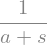

In [21]:
laplace_transform(sp.exp(-a*t), t, s)[0]

In [22]:
inverse_laplace_transform(a/(s**2 + a**2), s, t)

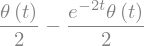

In [23]:
inverse_laplace_transform(1/(s*(s + 2)), s, t)

In [24]:
sp.init_printing(False)

## Aufgaben

Siehe auch Quellen oben, z. B.

- Papula: Klausur- und Übungsaufgaben, G, 5 Lösung linearer Anfangswertprobleme mit Hilfe der Laplace-Transformation, p.440 ff.
- Papula: Anwendungsbeispiele, XII, Laplace-Transformationen, p. 416 ff.

### Aufgabe 1: GDGL mit Laplacetrafo

Löse $\ddot{y} + 3\dot{y} + 2y = 1$ mit Null-Anfangsbedingungen $y(0)=0$ und $\dot{y}(0)=0$ mittels Laplace-Transformation.

*Quelle:* MacCluer: Industrial Mathematics. p. 150.

**Lösung:** $y(t) = \frac{1}{2} - e^{-t} + \frac{1}{2}e^{-2t}$

### Aufgabe 2: GDGL System mit Laplacetrafo

Löse das DGL-System

$$
\begin{align*}
 \dot{x} & = -2x - 9y \\
 \dot{y} & =   x - 2y
\end{align*}
$$

mit den Anfangsbedingungen $x(0)=-1$ und $y(0)=1$ mittels Laplace-Transformation.

*Quelle:* MacCluer: Industrial Mathematics. p. 151 f.

**Lösung:**

$$
\begin{align*}
 x(t) & = -e^{-2t}\cos(3t) - 3e^{-2t}\sin(3t) \\
 y(t) & =  e^{-2t}\cos(3t) - \frac{1}{3}e^{-2t}\sin(3t)
\end{align*}
$$

### Aufgabe 3: Übertragungsfunktion, Sprungantwort

1. Bestimmen Sie die Übertragungsfunktion der DGL $\dot{c}(t) + 2c(t) = r(t)$ mit Null-Anfangsbedingungen.
2. Sprungantwort: Bestimmen Sie die Antwort $c(t)$ des Systems auf die Einheitsstufenfunktion $r(t) = 1$ für $t\geq 0$ und $r(t) = 0$ für $t<0$ und Null-Anfangsbedingungen.

*Quelle:* Nise, Control Systems Engineering, Examples 2.4 and 2.5

**Lösung:**

1. Die DGL hat die Laplace-Transformation $sC(s) + 2C(s) = R(s)$. Die Übertragungsfunktion lautet $G(s) = \frac{C(s)}{R(s)}= \frac{1}{s + 2}$.
2. $c(t) = \frac{1}{2}(1 - e^{-2t})$

### Aufgabe 4: Übertragungsfunktion und DGL

1. Bestimmen Sie die Übertragungsfunktion der DGL 
   $\frac{\text{d}^3c}{dt^3} + 3\frac{\text{d}^2c}{dt^2} + 7\frac{\text{d}c}{dt} +5c = \frac{\text{d}^2r}{dt^2} + 4\frac{\text{d}r}{dt} + 3r$ mit Null-Anfangsbedingungen.
2. Welcher DGL entspricht die Übertragungsfunktion $G(s) = \frac{2s +1}{s^2 + 6s + 2}$?

*Quelle:* Nise, Control Systems Engineering, Skill-Assessment Exercise 2.3 and 2.4

**Lösung:**

1. $G(s) = \frac{C(s)}{R(s)} = \frac{s^2 + 4s + 3}{s^3 + 3s^2 + 7 s+ 5}$
2. $\frac{\text{d}^2c}{dt^2} + 6\frac{\text{d}c}{dt} +2c = 2\frac{\text{d}r}{dt} + r$ mit Null-Anfangsbedingungen

### Aufgabe 5: RLC-Schaltungen und Impedanzen

Impedances of resistor, capacitor and inductor:

| component | voltage $v(t)$ from current $i(t)$                 | current $i(t)$ from voltage $v(t)$                | impedance $Z(s) = \frac{V(s)}{I(s)}$ |
| --------- | -------------------------------------------------- | ------------------------------------------------- | ------------------------------------ |
| resistor  | $v(t) =R i(t)$                                     | $i(t) = \frac{1}{R}v(t)$                          | R                                    |
| capacitor | $v(t) = \frac{1}{C}\int_0^t i(\tau) \text{d} \tau$ | $i(t)=C\frac{\text{d}v(t)}{\text{d}t}$            | $\frac{1}{Cs}$                       |
| inductor  | $v(t) = L\frac{\text{d} i(t)}{\text{d}t}$          | $i(t)= \frac{1}{L}\int_0^t v(\tau) \text{d} \tau$ | $Ls$                                 |

![Nise Ex 2.6](abbildungen/my_Nise_Ex_2.6.png)

Assuming zero initial conditions, find the transfer function relating the capacitor voltage $V_C(s)$ to the input voltage $V(s)$ by 

1. first determining the differential equation relating $v_C(t)$ to $v(t)$ and then transforming it to the frequency domain.
2. using impedances and Kirchhoff's laws in frequency domain.

*Quelle:* Nise: Control Systems Engineering. Section 2.4 and Examples 2.6 and 2.7

### Aufgabe 6: Zeit- und Frequenzbereich

Lösen Sie die Differentialgelichung $\ddot{y} + 3\dot{y} + 2y = 0$ mit den Anfangsbedingungen $y(0)=2$ und $\dot{y}(0)= -3$

1. im Zeitbereich mit den Methoden aus dem Abschnitt GDGL,
2. im Frequenzbereich mittels Laplace-Transformation 

und überprüfen Sie Ihr Ergebnis am Computer.

*Quelle:* Holzner: Differential Equations for Dummies. p. 245 ff.

**Lösung:** $y(t) = e^{-t} + e^{-2t}$

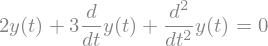

In [25]:
sp.init_printing()

t = sp.symbols('t')
y = sp.symbols('y', cls=sp.Function)
diffeq = sp.Eq(y(t).diff(t).diff(t) + 3*y(t).diff(t) + 2*y(t), 0) 
diffeq

In [26]:
ys = sp.dsolve(diffeq, y(t))
ys

In [27]:
sp.init_printing(False)

In [28]:
t = linspace(0, 10, 100)
y0 = array([2, -3])

A = array([[ 0,  1],
           [-2, -3]])
def fun(y, t):
    yp = dot(A, y)
    return yp

y = odeint(fun, y0, t)

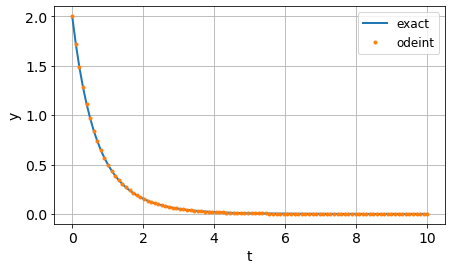

In [29]:
figure(figsize=(7,4))
plot(t, exp(-t) + exp(-2*t), '-', label = 'exact')
plot(t, y[:,0], '.', label = 'odeint')
xlabel('t')
ylabel('y')
legend()
grid(True)

### Aufgabe 7: RL-Schaltkreis mit Ramplenspannung

An eine Spule mit dem ohmschen Widerstand $R$ und der Induktivität $L$ (Serienschaltung) wird zum Zeitpunkt $t=0$ durch Schließen eines Schalters eine mit der Zeit $t$ linear ansteigende Spannung $u(t) = kt$ für $t \geq 0$ angelegt.
Bestimmen Sie mit Hilfe der Laplacetransformation den zeitlichen Verlauf der Stromstärke $i$ für $t \geq 0$ , wenn der
Stromkreis zu Beginn bei $t =0$ stromlos ist.

*Quelle:* Papula: Anwendungsbeispiele, XII, Laplace-Transformationen, Beispiel 3, p. 422ff.

**Lösung:** Papula: Anwendungsbeispiele, XII, Laplace-Transformationen, Beispiel 3, p. 422ff.: 
$i(t) = \frac{kL}{R^2}(e^{-\frac{R}{L}t} + \frac{R}{L}t - 1)$

### Aufgabe 8: GDGL im Frequenzbereich

Lösen Sie die GDGL $\ddot{y}(t) + \dot{y}(t) = e^{-2t}$ mit Anfangsbedingungen $y(0)=0$ und $\dot{y}(0)=1$ mittels Laplacetransformation.

*Quelle:* Papula, Band 2, VI Laplace-Transformation, Abschnitt 5, Aufgabe 9 c), p. 687

**Lösung:** Papula, Band 2, VI, p. 808. $y(t) = \frac{1}{2}e^{-2t} - 2e^{-t} + \frac{3}{2}$

### Aufgabe 9: System von GDGL im Frequenzbereich

Lösen Sie das folgende nicht-homogene, lineare GDGL-System mittels Laplace-Transformation.

$$
\begin{align*}
\dot{y}(t) & = - z(t) + t, & \quad y(0) = 1 \\
\dot{z}(t) & = - 4 y(t)  , & \quad z(0) = -1
\end{align*}
$$

*Quelle:* Bronson: Differential Equations. 4. Auflage, Aufgabe 25.2, S. 250.

**Lösung:**

$$
\begin{align*}
y(t) & = -\frac{1}{4} + \frac{7}{8}e^{2t} + \frac{3}{8}e^{-2t} \\
z(t) & = t - \frac{7}{4}e^{2t} + \frac{3}{4}e^{-2t}
\end{align*}
$$

### Aufgabe 10: System von GDGL  im Frequenzbereich

Lösen Sie das folgende nicht-homogene lineare GDGL-System mittels Laplace-Transformation.

$$
\begin{align*}
\dot{x_1}(t) & = -2 x_1(t) +   x_2(t) + 1, & \quad x_1(0) = 0 \\
\dot{x_2}(t) & =    x_1(t) - 2 x_2(t),     & \quad x_2(0) = 1
\end{align*}
$$

*Quelle:* Farlow, An Introduction to Differential Equations and their applications. p. 369

**Lösung:** 

$$
\begin{align*}
x_1(t) &= \mathcal{L}^{-1}\left(\frac{2}{s(s + 3)}\right) = \mathcal{L}^{-1}\left(\frac{2}{3s} - \frac{2}{3(s + 3)}\right) = \frac{2}{3} - \frac{2}{3}e^{-3t} \\
x_2(t) &= \mathcal{L}^{-1}\left(\frac{s + 1}{s(s + 3)}\right) = \mathcal{L}^{-1}\left(\frac{1}{3s} + \frac{2}{3(s + 3)}\right) = \frac{1}{3} + \frac{2}{3}e^{-3t}
\end{align*}
$$

### Aufgabe 11: GDGL im Frequenzbereich mit Anfangsbedingungen, Übertragungsfunktion

1. Lösen Sie $\ddot{y} - \dot{y} - 2y = 0$ mit Anfangsbedingungen $y(0)=1$ und $\dot{y}(0)= 4$ mittels Laplace-Transformation.
2. Wie lautet die GDGL zur Übertragungsfunktion $G(s) = \dfrac{10}{(s + 7)(s + 8)}$?

*Quellen:* 

1. Vereinfachung von Bronson: Differential Equations. 4. Auflage, 2014, p. 244, Problem 24.6
2. Nise: Control Systems Engineering. p. 94., problem 8b.

**Lösungen:** 

1. $x(t) = \frac{5}{3}e^{2t} - \frac{2}{3}e^{-t}$
2. $\ddot{c}(t) + 15\dot{c}(t) + 56c(t) =10r(t)$

### Aufgabe 12: Anfangswertproblem, Übertragungsfunktion

1. Lösen Sie die GDGL $y''(t) + 2y'(t) + y(t) = 9e^{2t}$ mit Anfangsbedingungen $y(0)=0$ und $y'(0)=1$ mittels Laplacetransformation.
2. Wie lautet die GDGL zur Übertragungsfunktion $G(s) = \dfrac{s + 2}{s^3 + 8s^2 + 9s + 15}$?

*Quellen:*

1. Papula, Band 2, VI, 5, p. 669f.
2. Nise, Chapter 2, problem 8c

**Lösungen:** 

1. $-(2t+1)e^{-t} + e^{2t}$
2. $c''' + 8c'' + 9c' + 15c = r' + 2r$

### Aufgabe 13: Laplacetransformation

1. Bestimmen Sie die inverse Laplacetransformierte von $\dfrac{s + 3}{s^2 - s -2}$.
2. Lösen Sie das folgende nicht-homogene, lineare GDGL-System mittels Laplace-Transformation.
   
   $$\begin{eqnarray*}
   \ddot{y}(t) + y(t) + z(t) & = 0, & \quad y(0) = 0,\quad \dot{y}(0) = 0 \\
   \dot{z}(t)  + \dot{y}(t)  & = 0, & \quad z(0) = 1
   \end{eqnarray*}$$

*Quellen:*

1. Bronson: Differential Equations. 4. Auflage, Aufgabe 22.13, S. 229.
2. Bronson: Differential Equations. 4. Auflage, Aufgabe 25.4, S. 251.

**Lösungen:**

1. $\frac{5}{3}e^{2t} - \frac{2}{3}e^{-t}$
2. \begin{align*}y(t) & = -\frac{1}{2}t^2 \\ z(t) & = 1 + \frac{1}{2}t^2\end{align*}